# Bayesian Neural Network Classification on IRIS dataset

In [1]:
!pip install torchbnn

In [2]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Iris Data

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data
Y = iris.target

In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([150, 4]), torch.Size([150]))

In [8]:
x

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [209]:
#Train test split
from sklearn.model_selection import train_test_split
X = x
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=41)

In [210]:
y_train

tensor([1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0,
        0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2,
        0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1,
        2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2])

In [211]:
X_train.shape

torch.Size([120, 4])

In [212]:
X_test.shape

torch.Size([30, 4])

In [213]:
# Remove class 1 (out of classes 0, 1 and 2) from the train data
X_train_filtered = X_train[y_train!=1]
X_train_filtered.shape

torch.Size([81, 4])

In [214]:
y_train_filtered = y_train[y_train!=1]
y_train_filtered.shape

torch.Size([81])

## 2. Define Model

In [238]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.5, in_features=4, out_features=8),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.5, in_features=8, out_features=9),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=1, in_features=9, out_features=3),
    nn.Softmax(dim=1)
)

In [239]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

optimizer = optim.Adam(model.parameters(), lr=0.01)

## 3. Train Model

In [240]:
kl_weight = 0.01
filter_train = False

In [241]:
filtered_indices = [i for (i, label) in enumerate(y_train) if label!=1]
X_train_filtered = X_train[torch.tensor(filtered_indices)]
y_train_filtered = y_train[torch.tensor(filtered_indices)]

In [242]:
len(filtered_indices)

81

In [243]:
y_train_filtered

tensor([2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
        0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2,
        2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0,
        2, 0, 0, 2, 2, 2, 2, 0, 2])

In [244]:
#Train the model only on classes 0 and 2
for step in range(2000):
    pre = model(X_train_filtered)
    ce = ce_loss(pre, y_train_filtered)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

_, predicted = torch.max(pre.data, 1)
total = y_train_filtered.size(0)
correct = (predicted == y_train_filtered).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 98.765432 %
- CE : 0.58, KL : 0.68


## 4. Test Model

In [245]:
# Sample 10k models and store the results
n_models = 10000
models_result = [model(X_test) for k in range(n_models)]

In [246]:
models_result[0][0].argmax().item()

2

In [247]:
results = np.zeros((n_models, X_test.shape[0]))     # num. of models, number of test datapoints
for i in range(n_models):
    for j in range(X_test.shape[0]):
        results[i][j] = models_result[i][j].argmax().item()

## Within sample mean and variation

In [248]:
X_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [249]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

# Unseen class

In [262]:
filtered_indices_unseen = [i for (i, label) in enumerate(y_test) if label==1]
X_test_filtered = X_test[torch.tensor(filtered_indices_unseen)]
y_test_filtered = y_test[torch.tensor(filtered_indices_unseen)]

In [263]:
n_models = 1000
samples = torch.zeros((n_models, len(y_test_filtered), 3))

for i in range(n_models) :
  print("\r", "\tTest run {}/{}".format(i+1, n_models), end="")

  samples[i,:,:] = model(X_test_filtered)

 	Test run 1000/1000

In [264]:
withinSampleMean = torch.mean(samples, dim=0)
samplesMean = torch.mean(samples, dim=(0,1))

withinSampleStd = torch.sqrt(torch.mean(torch.var(samples, dim=0), dim=0))
acrossSamplesStd = torch.std(withinSampleMean, dim=0)

print("")
print("Class prediction analysis:")
print("\tMean class probabilities:")
print(samplesMean)
print("\tPrediction standard deviation per sample:")
print(withinSampleStd)
print("\tPrediction standard deviation across samples:")
print(acrossSamplesStd)


Class prediction analysis:
	Mean class probabilities:
tensor([1.0142e-01, 1.8909e-04, 8.9840e-01], grad_fn=<MeanBackward1>)
	Prediction standard deviation per sample:
tensor([0.2724, 0.0026, 0.2726], grad_fn=<SqrtBackward0>)
	Prediction standard deviation across samples:
tensor([0.0655, 0.0001, 0.0656], grad_fn=<StdBackward0>)


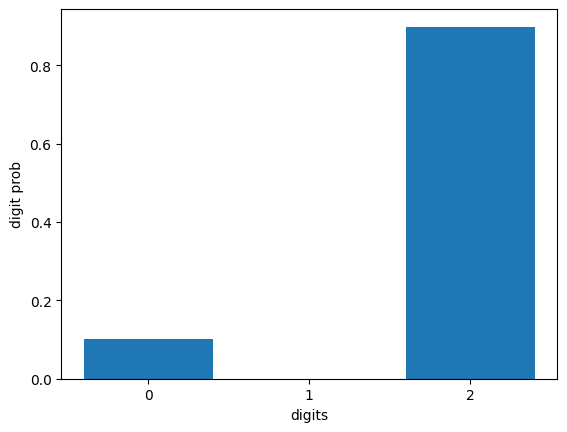

In [265]:
plt.figure("Unseen class probabilities")
plt.bar(np.arange(3), samplesMean.detach().numpy())
plt.xlabel('digits')
plt.ylabel('digit prob')
# plt.ylim([0,1])
plt.xticks(np.arange(3))
plt.show()

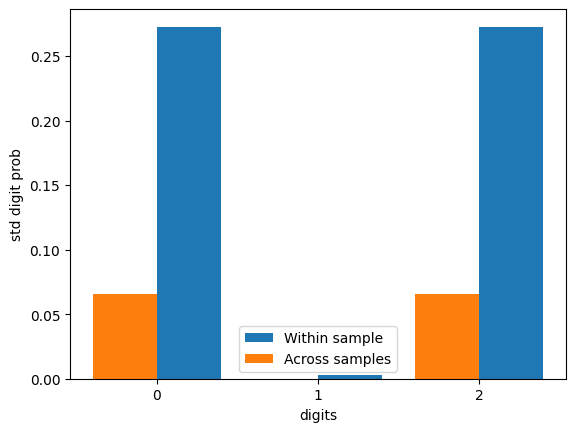

In [266]:
plt.figure("Unseen inner and outter sample std")
plt.bar(np.arange(3)+0.2, withinSampleStd.detach().numpy(), width = 0.4, label="Within sample")
plt.bar(np.arange(3)-0.2, acrossSamplesStd.detach().numpy(), width = 0.4, label="Across samples")
plt.legend()
plt.xlabel('digits')
plt.ylabel('std digit prob')
plt.xticks(np.arange(3))
plt.show()

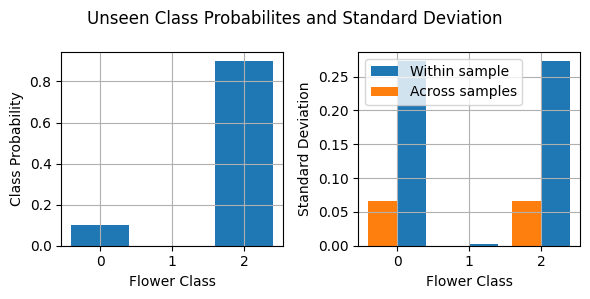

In [267]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].grid()
axs[0].bar(np.arange(3), samplesMean.detach().numpy())
axs[0].set(xlabel='Flower Class', ylabel='Class Probability', xticks=np.arange(3))
axs[1].grid()
axs[1].bar(np.arange(3)+0.2, withinSampleStd.detach().numpy(), width = 0.4, label="Within sample")
axs[1].bar(np.arange(3)-0.2, acrossSamplesStd.detach().numpy(), width = 0.4, label="Across samples")
axs[1].legend()
axs[1].set(xlabel='Flower Class', ylabel='Standard Deviation', xticks=np.arange(3))
fig.suptitle('Unseen Class Probabilites and Standard Deviation')
fig.tight_layout()
plt.savefig('unseen_class.pdf')
plt.show()

# Seen

In [268]:
filtered_indices_seen = [i for (i, label) in enumerate(y_test) if label==2]
X_test_filtered = X_test[torch.tensor(filtered_indices_seen)]
y_test_filtered = y_test[torch.tensor(filtered_indices_seen)]

In [269]:
n_models = 1000
samples = torch.zeros((n_models, len(y_test_filtered), 3))

for i in range(n_models) :
  print("\r", "\tTest run {}/{}".format(i+1, n_models), end="")

  samples[i,:,:] = model(X_test_filtered)

 	Test run 1000/1000

In [270]:
withinSampleMean = torch.mean(samples, dim=0)
samplesMean = torch.mean(samples, dim=(0,1))

withinSampleStd = torch.sqrt(torch.mean(torch.var(samples, dim=0), dim=0))
acrossSamplesStd = torch.std(withinSampleMean, dim=0)

print("")
print("Class prediction analysis:")
print("\tMean class probabilities:")
print(samplesMean)
print("\tPrediction standard deviation per sample:")
print(withinSampleStd)
print("\tPrediction standard deviation across samples:")
print(acrossSamplesStd)


Class prediction analysis:
	Mean class probabilities:
tensor([7.6020e-03, 2.8251e-06, 9.9240e-01], grad_fn=<MeanBackward1>)
	Prediction standard deviation per sample:
tensor([7.4792e-02, 5.5967e-05, 7.4804e-02], grad_fn=<SqrtBackward0>)
	Prediction standard deviation across samples:
tensor([6.2554e-03, 3.3124e-06, 6.2586e-03], grad_fn=<StdBackward0>)


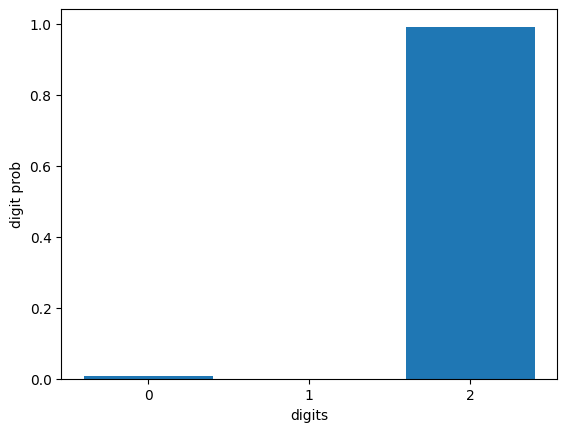

In [271]:
plt.figure("Seen class probabilities")
plt.bar(np.arange(3), samplesMean.detach().numpy())
plt.xlabel('digits')
plt.ylabel('digit prob')
# plt.ylim([0,1])
plt.xticks(np.arange(3))
plt.show()

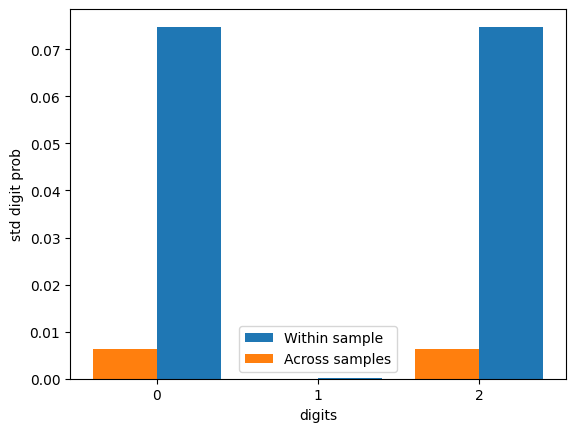

In [272]:
plt.figure("Unseen inner and outter sample std")
plt.bar(np.arange(3)+0.2, withinSampleStd.detach().numpy(), width = 0.4, label="Within sample")
plt.bar(np.arange(3)-0.2, acrossSamplesStd.detach().numpy(), width = 0.4, label="Across samples")
plt.legend()
plt.xlabel('digits')
plt.ylabel('std digit prob')
plt.xticks(np.arange(3))
plt.show()

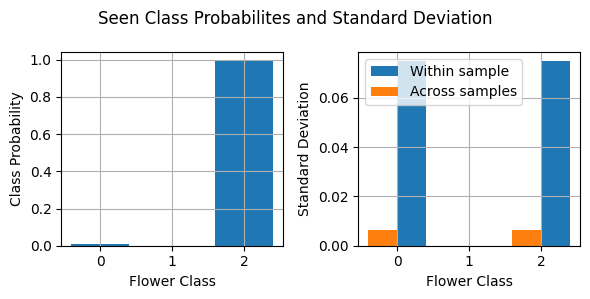

In [273]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].grid()
axs[0].bar(np.arange(3), samplesMean.detach().numpy())
axs[0].set(xlabel='Flower Class', ylabel='Class Probability', xticks=np.arange(3))
axs[1].grid()
axs[1].bar(np.arange(3)+0.2, withinSampleStd.detach().numpy(), width = 0.4, label="Within sample")
axs[1].bar(np.arange(3)-0.2, acrossSamplesStd.detach().numpy(), width = 0.4, label="Across samples")
axs[1].legend()
axs[1].set(xlabel='Flower Class', ylabel='Standard Deviation', xticks=np.arange(3))
fig.suptitle('Seen Class Probabilites and Standard Deviation')
fig.tight_layout()
plt.savefig('seen_class.pdf')
plt.show()

In [ ]:
samples.shape

In [62]:
withinSampleMean.shape

torch.Size([9, 3])